In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data = {
 'Age': [45, 54, 38, 29, 61, 47, 34, 59, 40, 52],
 'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M'],
 'Smoking': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
 'Exercise': [0, 1, 0, 1, 0, 1, 1, 0, 0, 1],
 'Cholesterol': [210, 180, 250, 190, 300, 240, 200, 230, 260, 220],
 'Disease': ['Diabetes', 'Healthy', 'Heart', 'Healthy', 'Cancer', 'Diabetes', 'Healthy',
'Heart', 'Cancer', 'Healthy']
}
df = pd.DataFrame(data)
df.head()

,Age,Gender,Smoking,Exercise,Cholesterol,Disease
0,45,M,1,0,210,Diabetes
1,54,F,0,1,180,Healthy
2,38,F,1,0,250,Heart
3,29,M,0,1,190,Healthy
4,61,M,1,0,300,Cancer


In [5]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) # M=1, F=0
df['Disease'] = le.fit_transform(df['Disease']) # Encoded target variable
X = df.drop('Disease', axis=1)
y = df['Disease']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,
random_state=42)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

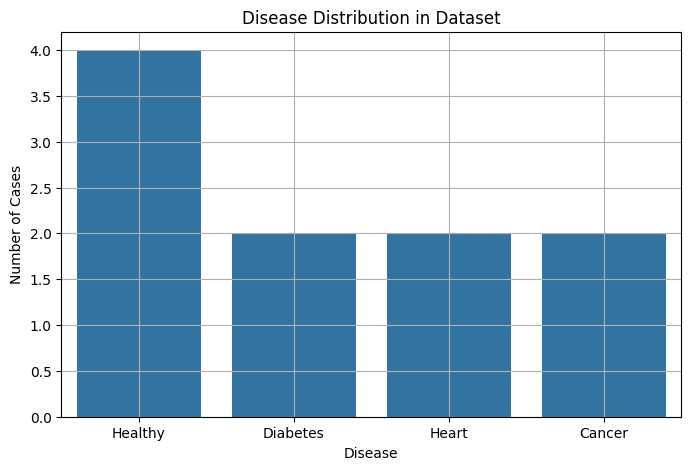

In [8]:
disease_counts = df['Disease'].value_counts()
labels = le.inverse_transform(disease_counts.index)
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=disease_counts.values)
plt.title("Disease Distribution in Dataset")
plt.xlabel("Disease")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

In [9]:
sample = pd.DataFrame([[50, 1, 1, 0, 260]], columns=['Age', 'Gender', 'Smoking',
'Exercise', 'Cholesterol'])
sample_scaled = scaler.transform(sample)
predicted_class = model.predict(sample_scaled)
print("Predicted Disease:", le.inverse_transform(predicted_class)[0])

Predicted Disease: Heart
